# **Set up**

In [3]:
!pip install summarytools
!pip install vncorenlp

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1.6/1.6 MB 8.5 MB/s eta 0:00:00
  Created wheel for summarytools: filename=summarytools-0.2.3-py3-none-any.whl size=8572 sha256=6bbadd4f5f80aaae2b9313b3a95aa134c7ba74f429e6d80b932395b9e3e083ec
  Stored in directory: /root/.cache/pip/wheels/d5/8a/5d/008e2127a7f9dd64d066f16e5ea268fa52823dc929c982d6f1
Successfully built summarytools
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2.6/2.6 MB 10.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for vncorenlp: filename=vncorenlp-1.0.3-py3-none-any.whl size=2645932 sha256=79cf6009cfe469f2b75cd6c1227bce071ab3e9acc013e0b1b08e452280d6b1f4
  Stored in directory: /root/.cache/pip/wheels/5d

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from vncorenlp import VnCoreNLP
from sklearn.decomposition import PCA

from sklearn.multioutput import MultiOutputClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

from summarytools import dfSummary
from collections import Counter
import string
import re
from nltk import Tree

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!mkdir -p vncorenlp/models/wordsegmenter
!mkdir -p vncorenlp/models/postagger
!wget https://raw.githubusercontent.com/vncorenlp/VnCoreNLP/master/VnCoreNLP-1.1.1.jar
!wget https://raw.githubusercontent.com/vncorenlp/VnCoreNLP/master/models/wordsegmenter/vi-vocab
!wget https://raw.githubusercontent.com/vncorenlp/VnCoreNLP/master/models/wordsegmenter/wordsegmenter.rdr
!wget https://raw.githubusercontent.com/vncorenlp/VnCoreNLP/master/models/postagger/vi-tagger
!mv VnCoreNLP-1.1.1.jar vncorenlp/
!mv vi-vocab vncorenlp/models/wordsegmenter/
!mv wordsegmenter.rdr vncorenlp/models/wordsegmenter/
!mv vi-tagger vncorenlp/models/postagger

--2024-01-05 14:54:30--  https://raw.githubusercontent.com/vncorenlp/VnCoreNLP/master/VnCoreNLP-1.1.1.jar
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 27412575 (26M) [application/octet-stream]
Saving to: ‚ÄòVnCoreNLP-1.1.1.jar‚Äô

VnCoreNLP-1.1.1.jar 100%[===================>]  26.14M  --.-KB/s    in 0.1s    

2024-01-05 14:54:31 (177 MB/s) - ‚ÄòVnCoreNLP-1.1.1.jar‚Äô saved [27412575/27412575]

--2024-01-05 14:54:31--  https://raw.githubusercontent.com/vncorenlp/VnCoreNLP/master/models/wordsegmenter/vi-vocab
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaitin

# **Training Set Preparation**

In [1]:
aspect_cols = ['GENERAL', 'SCREEN', 'CAMERA', 'FEATURES', 'BATTERY', 'PERFORMANCE', 'STORAGE', 'DESIGN', 'PRICE', 'SER&ACC']

In [6]:
df_train = pd.read_csv("/content/drive/MyDrive/HocMayThongKe/Project/Preprocessed Dataset/df_train.csv")
df_train

comment  GENERAL  SCREEN  \
0     M·ªõi mua m√°y n√†y T·∫°i thegioididong th·ªët n·ªët c·∫£m...        1       0   
1     Pin k√©m c√≤n l·∫°i mi·ªÖn ch√™ mua 8/3/2019 t√¨nh tr·∫°...        1       0   
2     Sao l√∫c g·ªçi ƒëi·ªán tho·∫°i m√†n h√¨nh b·ªã ch·∫•m nh·ªè nh...        0       0   
3     M·ªçi ng∆∞·ªùi c·∫≠p nh·∫≠t ph·∫ßn m·ªÅm l·∫°i , n√≥ s·∫Ω b·ªõt t·ªë...        0       0   
4     M·ªõi mua S√†i ƒë∆∞·ª£c 1 th√°ng th·∫•y pin r·∫•t tr√¢u, S√†...        0       0   
...                                                 ...      ...     ...   
7781  8g. C√°i ƒëi ƒë√°nh l√† m·∫°ng gi·∫≠t gi·∫≠t ko ch·ªãu n·ªïi....        0       0   
7782  Mua dk gi·∫£m 500k m√† l·ªói l√≤i ra h·∫øt treo m√†n h√¨...        0       0   
7783  M√°y S√†i 3 th√°ng r·ªìi r·∫•t OK.pin tr√¢u kh·ªèi n√≥i S...        1       0   
7784  R·∫•t ti·∫øc h√†ng realme ko c√≥ ·ªëp l∆∞ng ngo√†i , n√™n...        1       0   
7785  M√¨nh r·∫•t th·∫•t v·ªçng khi mua m√°y n√†y. B·∫Øt wifi c...       -1       0   

      CAMERA  FEATURES  BATTERY  PERFORMANCE  STORAGE  DESIGN  PRICE  SER&ACC  \
0          1         1        1            0        0       0      1        1   
1          0         0       -1            0        0       0      0        0   
2          0        -1        0            0        0       0      0        0   
3          0        -1        0            0        0       0      0        0   
4          0         0        1            1        0       0      0       -1   
...      ...       ...      ...          ...      ...     ...    ...      ...   
7781       0        -1       -1           -1        0       0      0        0   
7782       0        -1        0           -1        0       0      1        0   
7783       0         0        1            1        0       0      0        0   
7784       0         0        0            0        0       0     -1       -1   
7785       0        -1        0            0        0       0      0       -1   

      OTHERS  
0          0  
1          1  
2          0  
3          0  
4          0  
...      ...  
7781       0  
7782       0  
7783       0  
7784       0  
7785       0  

[7786 rows x 12 columns]

**remove punctuation**

In [7]:
def remove_punctuation(s):
    # S·ª≠ d·ª•ng h√†m translate ƒë·ªÉ lo·∫°i b·ªè d·∫•u c√¢u
    translator = str.maketrans("", "", string.punctuation)
    s_without_punctuation = s.translate(translator)
    return s_without_punctuation

def remove_punctuation_all_rows(all_rows):
    all_rows_without_punctuation = []
    for row in all_rows:
      all_rows_without_punctuation.append(remove_punctuation(row))
    return all_rows_without_punctuation

In [8]:
print('Row 01:', df_train['comment'].values[1])
print('Row 16:', df_train['comment'].values[16])
print('Row 16:', df_train['comment'].values[108])

Row 01: Pin k√©m c√≤n l·∫°i mi·ªÖn ch√™ mua 8/3/2019 t√¨nh tr·∫°ng pin c√≤n 88% c√≥ ai gi·ªëng t√¥i kh√¥ng
Row 16: D√πng ok.. M∆∞·ª£t k n√≥ng..( ƒët c√≥ 5 6 tri·ªáu m√† m·ªü max c·∫•u h√¨nh r√≤i k√™u n√≥ng) Nh√¢n vi√™n nhi·ªát t√¨nh..
Row 16: C·∫£m nh·∫≠n sau khi s·ª≠ d·ª•ng 5 th√°ng...
M√°y ok t·ªët, pin l√¢u c·∫•u h√¨nh ch∆°i game ·ªïn, c√≥ 1 ƒëi·ªÅu camera ko ƒëc t·ªët.....
X·ªã h·∫øttttttttttttttttttttttttttttttttttttttttttttttttttttttttttt


In [9]:
all_raw_rows = df_train['comment'].values
all_rows_without_punctuation = remove_punctuation_all_rows(all_raw_rows)

print('Row 01:', all_rows_without_punctuation[1])
print('Row 16:', all_rows_without_punctuation[16])
print('Row 16:', all_rows_without_punctuation[108])

Row 01: Pin k√©m c√≤n l·∫°i mi·ªÖn ch√™ mua 832019 t√¨nh tr·∫°ng pin c√≤n 88 c√≥ ai gi·ªëng t√¥i kh√¥ng
Row 16: D√πng ok M∆∞·ª£t k n√≥ng ƒët c√≥ 5 6 tri·ªáu m√† m·ªü max c·∫•u h√¨nh r√≤i k√™u n√≥ng Nh√¢n vi√™n nhi·ªát t√¨nh
Row 16: C·∫£m nh·∫≠n sau khi s·ª≠ d·ª•ng 5 th√°ng
M√°y ok t·ªët pin l√¢u c·∫•u h√¨nh ch∆°i game ·ªïn c√≥ 1 ƒëi·ªÅu camera ko ƒëc t·ªët
X·ªã h·∫øttttttttttttttttttttttttttttttttttttttttttttttttttttttttttt


**remove repeated characters**

In [10]:
def remove_repeated_characters(s):
    # S·ª≠ d·ª•ng regular expression ƒë·ªÉ lo·∫°i b·ªè c√°c k√≠ t·ª± l·∫∑p l·∫°i qu√° nhi·ªÅu
    s = re.sub(r'(\w)\1+', r'\1', s)
    return s

def remove_all_repeated_characters(all_rows):
    all_rows_without_repeated_characters = []
    for row in all_rows:
        all_rows_without_repeated_characters.append(remove_repeated_characters(row))
    return all_rows_without_repeated_characters

In [11]:
print('Row 16:', all_rows_without_punctuation[108])

Row 16: C·∫£m nh·∫≠n sau khi s·ª≠ d·ª•ng 5 th√°ng
M√°y ok t·ªët pin l√¢u c·∫•u h√¨nh ch∆°i game ·ªïn c√≥ 1 ƒëi·ªÅu camera ko ƒëc t·ªët
X·ªã h·∫øttttttttttttttttttttttttttttttttttttttttttttttttttttttttttt


In [12]:
all_rows_without_repeated_characters = remove_all_repeated_characters(all_rows_without_punctuation)

print('Row 16:', all_rows_without_repeated_characters[108])

Row 16: C·∫£m nh·∫≠n sau khi s·ª≠ d·ª•ng 5 th√°ng
M√°y ok t·ªët pin l√¢u c·∫•u h√¨nh ch∆°i game ·ªïn c√≥ 1 ƒëi·ªÅu camera ko ƒëc t·ªët
X·ªã h·∫øt


**remove stop words**

In [13]:
vietnamese_stopwords = pd.read_csv("/content/drive/MyDrive/HocMayThongKe/Project/extra file/vietnamese_stopwords.txt", header=None, names=['Stop Words'])
vietnamese_stopwords

Stop Words
0          a l√¥
1          a ha
2            ai
3         ai ai
4        ai n·∫•y
...         ...
1938      ·ª´ nh√©
1939      ·ª´ th√¨
1940       ·ª´ √†o
1941        ·ª´ ·ª´
1942          ·ª≠

[1943 rows x 1 columns]

In [14]:
def remove_stopwords(row):
    words = row.split()
    filtered_words = [word for word in words if word.lower() not in vietnamese_stopwords['Stop Words'].values]
    return ' '.join(filtered_words)

def remove_stopwords_all_rows(all_rows):
    all_rows_without_stopwords = []
    for row in all_rows:
        all_rows_without_stopwords.append(remove_stopwords(row))
    return all_rows_without_stopwords

In [15]:
all_rows_without_repeated_characters[:5]

['M·ªõi mua m√°y n√†y T·∫°i thegioididong th·ªët n·ªët c·∫£m th·∫•y ok bin tr√¢u ch·ª•p ·∫£nh ƒë·∫πp loa nghe to b·∫Øt wf kh·ªèe s√≥ng ·ªïn ƒë·ªãnh gi√° th√†nh v·ª´a v·ªõi t√∫i ti·ªÅn nh√¢n vi√™n t∆∞ v·∫•n nhi·ªát t√¨nh',
 'Pin k√©m c√≤n l·∫°i mi·ªÖn ch√™ mua 832019 t√¨nh tr·∫°ng pin c√≤n 8 c√≥ ai gi·ªëng t√¥i kh√¥ng',
 'Sao l√∫c g·ªçi ƒëi·ªán tho·∫°i m√†n h√¨nh b·ªã ch·∫•m nh·ªè nh√°y g·∫ßn camera tr∆∞·ªõc v·∫≠yl√∫c c√≥ l√∫c kh√¥ng',
 'M·ªçi ng∆∞·ªùi c·∫≠p nh·∫≠t ph·∫ßn m·ªÅm l·∫°i  n√≥ s·∫Ω b·ªõt t·ªën pin m√¨nh ƒë√£ th·ª≠ r·ªìi m·ªçi th·ª© c≈©ng ok nh∆∞ng v√¢n tay ko nh·∫°y',
 'M·ªõi mua S√†i ƒë∆∞·ª£c 1 th√°ng th·∫•y pin r·∫•t tr√¢u S√†i bao m∆∞·ª£t  Nh∆∞ng c√≥ 1 l·ªói nh·ªè l√† m√¨nh nghe nh·∫°c b·∫±ng tai nghe nghe h∆°i l√¢u ko bi·∫øt sao n√≥ ko nghe ƒë∆∞·ª£c n·ªØa m·∫•t r√∫t tai nghe ra c·∫Øm v√†o l·∫°i th√¨ n√≥ m·ªõi nghe ƒë∆∞·ª£c']

In [16]:
all_rows_without_stopwords = remove_stopwords_all_rows(all_rows_without_repeated_characters)
all_rows_without_stopwords[:5]

['mua m√°y thegioididong n·ªët c·∫£m ok bin tr√¢u ch·ª•p ·∫£nh ƒë·∫πp loa to b·∫Øt wf kh·ªèe s√≥ng ·ªïn ƒë·ªãnh gi√° th√†nh t√∫i ti·ªÅn nh√¢n vi√™n t∆∞ v·∫•n nhi·ªát t√¨nh',
 'Pin k√©m mi·ªÖn ch√™ mua 832019 t√¨nh tr·∫°ng pin 8',
 'g·ªçi ƒëi·ªán tho·∫°i m√†n h√¨nh ch·∫•m nh√°y camera v·∫≠yl√∫c',
 'c·∫≠p nh·∫≠t m·ªÅm b·ªõt t·ªën pin th·ª≠ ok v√¢n ko nh·∫°y',
 'mua S√†i 1 pin tr√¢u S√†i bao m∆∞·ª£t 1 l·ªói nh·∫°c tai h∆°i ko ko r√∫t tai c·∫Øm']

**tokenization and postag**

In [ ]:
tok_pos = VnCoreNLP("/content/vncorenlp/VnCoreNLP-1.1.1.jar", annotators="wseg,pos", max_heap_size='-Xmx500m')
tokenizer = VnCoreNLP("/content/vncorenlp/VnCoreNLP-1.1.1.jar", annotators="wseg", max_heap_size='-Xmx500m')

In [ ]:
def tokenize(row):
    processed_row = ""
    tokenized_sents = tok_pos.tokenize(row)
    for lst_token_in_sent in tokenized_sents:
        processed_row += " ".join(lst_token_in_sent)

    return processed_row

In [ ]:
def tokenize_all_rows(all_rows):
    processed_rows = []
    for row in all_rows:
        processed_rows.append(tokenize(row))

    return processed_rows

In [ ]:
def tok_pos_all_rows(all_rows):
    lst = []
    for row in all_rows:
      lst.append(tok_pos.annotate(row))
    return lst

compare pos tag on raw text and preprocessed text (remove punctuation, stopwords, repeated characters)  

In [ ]:
lst_tok_pos = tok_pos_all_rows(all_raw_rows)

In [ ]:
# tokenize and conduct pos tag task on raw text
lst_tok_pos[0]

{'sentences': [[{'index': 1, 'form': 'M·ªõi', 'posTag': 'R', 'head': -1},
   {'index': 2, 'form': 'mua', 'posTag': 'V', 'head': -1},
   {'index': 3, 'form': 'm√°y', 'posTag': 'N', 'head': -1},
   {'index': 4, 'form': 'n√†y', 'posTag': 'P', 'head': -1},
   {'index': 5, 'form': 'T·∫°i', 'posTag': 'E', 'head': -1},
   {'index': 6, 'form': 'thegioididong', 'posTag': 'N', 'head': -1},
   {'index': 7, 'form': 'th·ªët_n·ªët', 'posTag': 'N', 'head': -1},
   {'index': 8, 'form': 'c·∫£m_th·∫•y', 'posTag': 'V', 'head': -1},
   {'index': 9, 'form': 'ok', 'posTag': 'V', 'head': -1},
   {'index': 10, 'form': 'bin', 'posTag': 'N', 'head': -1},
   {'index': 11, 'form': 'tr√¢u', 'posTag': 'N', 'head': -1},
   {'index': 12, 'form': 'ch·ª•p', 'posTag': 'V', 'head': -1},
   {'index': 13, 'form': '·∫£nh', 'posTag': 'N', 'head': -1},
   {'index': 14, 'form': 'ƒë·∫πp', 'posTag': 'A', 'head': -1},
   {'index': 15, 'form': 'loa', 'posTag': 'N', 'head': -1},
   {'index': 16, 'form': 'nghe', 'posTag': 'V', 'head

In [ ]:
# tokenize and conduct pos tag task on preprocessed text
tok_pos_all_rows(all_rows_without_stopwords[:3])[0]

{'sentences': [[{'index': 1, 'form': 'mua', 'posTag': 'V', 'head': -1},
   {'index': 2, 'form': 'm√°y', 'posTag': 'N', 'head': -1},
   {'index': 3, 'form': 'thegioididong', 'posTag': 'V', 'head': -1},
   {'index': 4, 'form': 'n·ªët', 'posTag': 'N', 'head': -1},
   {'index': 5, 'form': 'c·∫£m', 'posTag': 'V', 'head': -1},
   {'index': 6, 'form': 'ok', 'posTag': 'Nb', 'head': -1},
   {'index': 7, 'form': 'bin', 'posTag': 'N', 'head': -1},
   {'index': 8, 'form': 'tr√¢u', 'posTag': 'N', 'head': -1},
   {'index': 9, 'form': 'ch·ª•p', 'posTag': 'V', 'head': -1},
   {'index': 10, 'form': '·∫£nh', 'posTag': 'N', 'head': -1},
   {'index': 11, 'form': 'ƒë·∫πp', 'posTag': 'A', 'head': -1},
   {'index': 12, 'form': 'loa', 'posTag': 'N', 'head': -1},
   {'index': 13, 'form': 'to', 'posTag': 'A', 'head': -1},
   {'index': 14, 'form': 'b·∫Øt', 'posTag': 'V', 'head': -1},
   {'index': 15, 'form': 'wf', 'posTag': 'N', 'head': -1},
   {'index': 16, 'form': 'kho·∫ª', 'posTag': 'A', 'head': -1},
   {'ind

In [ ]:
pos_tags = lst_tok_pos[0]['sentences'][0]
for token in pos_tags:
    print(((token['form'], token['posTag'])))

('M·ªõi', 'R')
('mua', 'V')
('m√°y', 'N')
('n√†y', 'P')
('T·∫°i', 'E')
('thegioididong', 'N')
('th·ªët_n·ªët', 'N')
('c·∫£m_th·∫•y', 'V')
('ok', 'V')
('bin', 'N')
('tr√¢u', 'N')
('ch·ª•p', 'V')
('·∫£nh', 'N')
('ƒë·∫πp', 'A')
('loa', 'N')
('nghe', 'V')
('to', 'A')
('b·∫Øt', 'V')
('wf', 'N')
('kho·∫ª', 'A')
('s√≥ng', 'N')
('·ªïn_ƒë·ªãnh', 'A')
(',', 'CH')
('gi√°_th√†nh', 'N')
('v·ª´a', 'R')
('v·ªõi', 'E')
('t√∫i_ti·ªÅn', 'N')
(',', 'CH')
('nh√¢n_vi√™n', 'N')
('t∆∞_v·∫•n', 'V')
('nhi·ªát_t√¨nh', 'N')


In [ ]:
pos_tags = lst_tok_pos[0]['sentences'][0]
tree_structure = []

for token in pos_tags:
    tree_structure.append((token['form'], token['posTag']))

tree = Tree('Sentence', tree_structure)
tree.pretty_print()

                                                                                                               Sentence                                                                                                                       
   _______________________________________________________________________________________________________________|____________________________________________________________________________________________________________________        
M·ªõi/R mua/V m√°y/N n√†y/P T·∫°i/E thegioididong/N th·ªët_n·ªët/N c·∫£m_th·∫•y/V ok/V bin/N tr√¢u/N ch·ª•p/V ·∫£nh/N ƒë·∫πp/A loa/N  nghe/V  to/A b·∫Øt/V wf/N kho·∫ª/A s√≥ng/N ·ªïn_ƒë·ªãnh/A ,/CH gi√°_th√†nh/N v·ª´a/R v·ªõi/E t√∫i_ti·ªÅn/N ,/CH nh√¢n_vi√™n/N t∆∞_v·∫•n/V nhi·ªát_t√¨nh/N



**extract features**

In [ ]:
tfidf_vectorizer = TfidfVectorizer()

X_train_tok = tokenize_all_rows(all_rows_without_stopwords)

X_train_tok_enc = tfidf_vectorizer.fit_transform(X_train_tok)
X_train_tok_enc.toarray().shape

(7786, 10789)

In [ ]:
X_train_tok[:10]

['mua m√°y thegioididong n·ªët c·∫£m ok bin tr√¢u ch·ª•p ·∫£nh ƒë·∫πp loa to b·∫Øt wf kho·∫ª s√≥ng ·ªïn_ƒë·ªãnh gi√°_th√†nh t√∫i_ti·ªÅn nh√¢n_vi√™n t∆∞_v·∫•n nhi·ªát_t√¨nh',
 'Pin k√©m mi·ªÖn ch√™ mua 832019 t√¨nh_tr·∫°ng pin 8',
 'g·ªçi ƒëi·ªán_tho·∫°i m√†n_h√¨nh ch·∫•m nh√°y camera v·∫≠yl√∫c',
 'c·∫≠p_nh·∫≠t m·ªÅm b·ªõt t·ªën pin th·ª≠ ok v√¢n ko nh·∫°y',
 'mua S√†i 1 pin tr√¢u S√†i bao m∆∞·ª£t 1 l·ªói nh·∫°c tai h∆°i ko ko r√∫t tai c·∫Øm',
 'X√†i m∆∞·ª£t pin tr√¢u ƒë·ªô nh√¢n_vi√™n nhi·ªát_t√¨nh vui_v·∫ª t·∫ßm gi√° m√°y',
 'x√†i 7 7 pin Ch·∫£ m√°y ki·ªÉu l∆∞·ªõt web game ko',
 'H√¥m 2362020 e gi·ªõi di_ƒë·ªông mua dthoai galaxy A51 ƒë·∫ßu c·ª≠a_h√†ng b√°o_gi√° 790ƒë t·∫∑ng phi·∫øu mua h√†ng 250k to√°n nh√¢n_vi√™n to√°n 790ƒë phi·∫øu mua h√†ng ƒëi 20km mua thoai t·ªëi nh√¢n_vi√™n g·ªçi l·ªói sai x√≥t b·∫£o phi·∫øu mua h√†ng 250k ch√°n th·ªùi_gian',
 'ƒëi·ªán_tho·∫°i s·∫°c n√≥ng m√°y tr·ªùi T t·∫Øt t·∫•t m·∫°ng ·ª©ng dung game c·∫•m ko ch·∫°y ko s·∫°c ƒëi·ªán_tho·∫°i n√≥ng tr·ªùi S·∫°

In [ ]:
y_train = df_train.iloc[:, 1:]
y_train.shape

(7786, 11)

In [ ]:
min_values = np.min(X_train_tok_enc, axis=0)
max_values = np.max(X_train_tok_enc, axis=0)
diff = max_values.toarray() - min_values.toarray() # alternative way, max_values.A - min_values.A
diff

array([[0.49369367, 0.31529402, 0.18894272, ..., 0.42096877, 0.50055016,
        0.20045657]])

Text(0.5, 1.0, 'Min-Max Range Distribution Of All Feature Columns in Train Set')

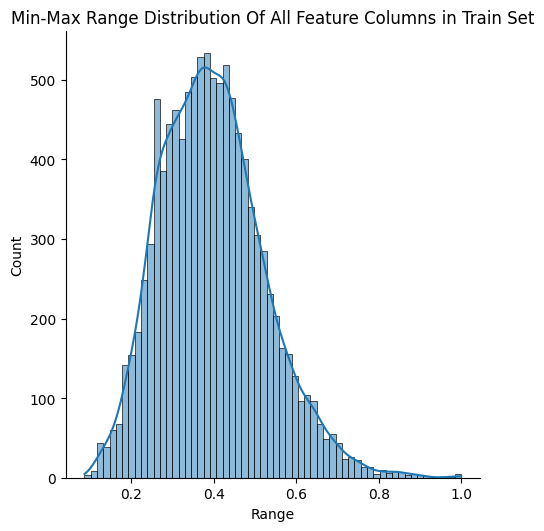

In [ ]:
diff = diff.flatten()

sns.displot(diff, kde=True)
plt.ylabel('Count')
plt.xlabel('Range')
plt.title('Min-Max Range Distribution Of All Feature Columns in Train Set')

# **Testing Set Preparation**

In [ ]:
df_test = pd.read_csv("/content/drive/MyDrive/HocMayThongKe/Project/Preprocessed Dataset/df_test.csv")
df_test

comment  GENERAL  SCREEN  \
0     ƒêi·ªán tho·∫£i ·ªïn. Facelock c·ª±c nhanh, v√¢n tay √¥k ...        1       1   
1     M√¨nh m·ªõi  mua vivo91c. T·∫£i ·ª©ng d·ª•ng ,games  nh...        0       0   
2     X·∫•u ƒë·∫πp g√¨ ko bi·∫øt nh∆∞ng r·∫•t ∆∞ng TGdƒë ph·ª•c v·ª• ...        0       0   
3     M√†n h√¨nh h∆°i l√°c khi ch∆°i game. Game n·∫∑ng th√¨ ...        0       0   
4     N√≥i chung m√°y ƒë·∫πp v·ªõi m√†n amoled, ·ªïn trong t·∫ßm...        0       1   
...                                                 ...      ...     ...   
2219  M·∫´u m√£ ƒë·∫πp lung linh. M√°y ch·∫°y c·ª±c nhanh, m∆∞·ª£t...        0       0   
2220  C√≥ ai b·ªã gi·ªëng m√¨nh kh√¥ng m√°y th√¨ s√†i b√¨nh th∆∞...        0       0   
2221  S·∫£n ph·∫©m t·ªët üòä\nAi ch∆°i game c·ª© mang 1 em v·ªÅ m...        1       0   
2222  V·ª´a m·ªõi mua xong m√°y r·∫•t ƒë·∫πp nh√¢n vi√™n r·∫•t nhi...        0       0   
2223  M√¨nh mua dt c≈© nh∆∞ng x√†i r·∫•t t·ªët pin xu·ªëng l√¢u...        1       0   

      CAMERA  FEATURES  BATTERY  PERFORMANCE  STORAGE  DESIGN  PRICE  SER&ACC  \
0          0         1        0            1        0       0      0        0   
1          0        -1        0            1        0       0      0        1   
2          0         0        0            0        0       0      0        1   
3          0         0        0           -1        0      -1      0        0   
4          0         0       -1            0        0       1      0        0   
...      ...       ...      ...          ...      ...     ...    ...      ...   
2219       0         1        0            1        0       1      0        0   
2220       0         0        0           -1        0       0      0        0   
2221       0         0        0            1        0       0      0        0   
2222       1         0        1            1        0       1      0        1   
2223       0         0        1            0        0       0      0        1   

      OTHERS  
0          0  
1          1  
2          0  
3          1  
4          0  
...      ...  
2219       1  
2220       0  
2221       0  
2222       0  
2223       0  

[2224 rows x 12 columns]

In [ ]:
all_raw_rows_test = df_test['comment'].values
all_rows_without_punctuation_test = remove_punctuation_all_rows(all_raw_rows_test)

all_rows_without_repeated_characters_test = remove_all_repeated_characters(all_rows_without_punctuation_test)

all_rows_without_stopwords_test = remove_stopwords_all_rows(all_rows_without_repeated_characters_test)

In [ ]:
X_test_tok = tokenize_all_rows(all_rows_without_stopwords_test)
X_test_tok_enc = tfidf_vectorizer.transform(X_test_tok)
X_test_tok_enc.toarray().shape

(2224, 10789)

In [ ]:
y_test = df_test.iloc[:, 1:]
y_test.shape

(2224, 11)

Text(0.5, 1.0, 'Min-Max Range Distribution Of All Feature Columns in Test Set')

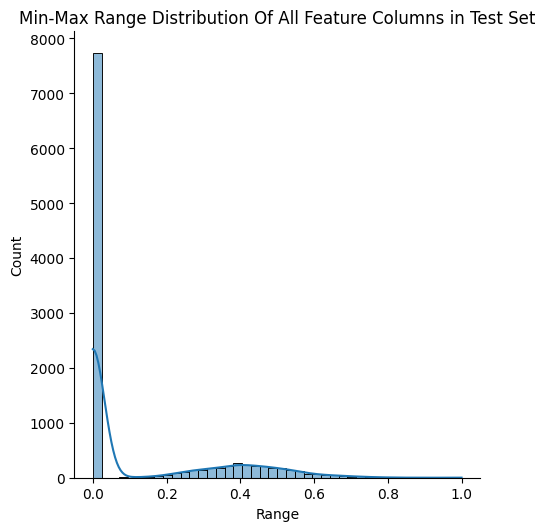

In [ ]:
min_values = np.min(X_test_tok_enc, axis=0)
max_values = np.max(X_test_tok_enc, axis=0)
diff = max_values.toarray() - min_values.toarray() # alternative way, max_values.A - min_values.A

diff = diff.flatten()

sns.displot(diff, kde=True)
plt.ylabel('Count')
plt.xlabel('Range')
plt.title('Min-Max Range Distribution Of All Feature Columns in Test Set')

# **Dataset Statistic**

Text(0.5, 1.0, 'Statistics on the number of samples in training & testing set')

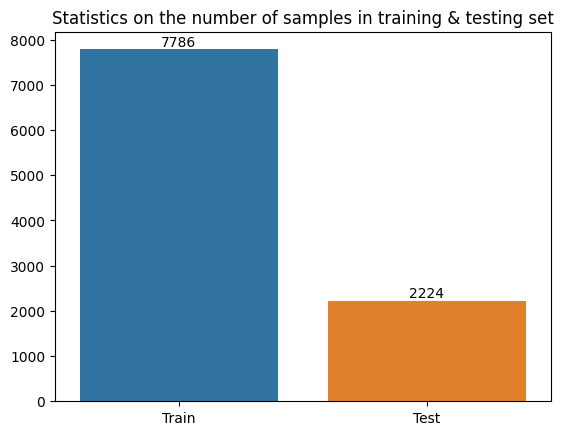

In [ ]:
size = [df_train.shape[0], df_test.shape[0]]
ax = sns.barplot(x=['Train', 'Test'], y=size)

for i, v in enumerate(size):
    ax.text(i, v + 0.1, str(v), ha='center', va='bottom')

plt.title('Statistics on the number of samples in training & testing set')

In [ ]:
# Training Data Frame Summary
dfSummary(df_train.iloc[:,1:])

In [ ]:
# Testing Data Frame Summary
dfSummary(df_test.iloc[:,1:])

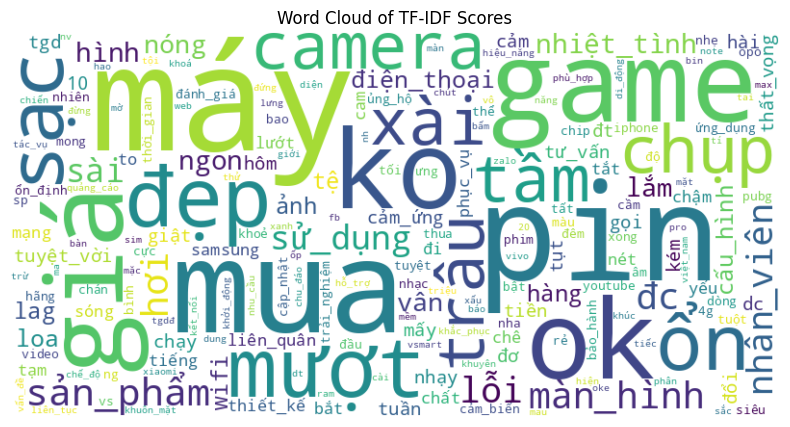

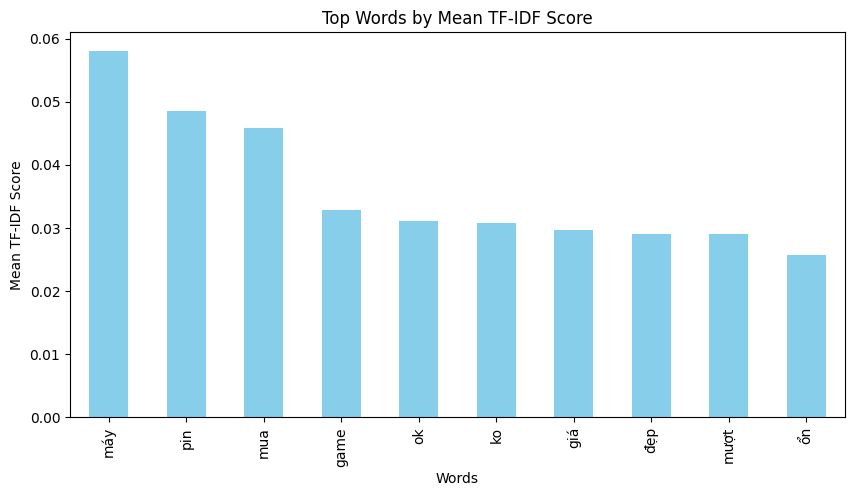

In [ ]:
from wordcloud import WordCloud
feature_names = tfidf_vectorizer.get_feature_names_out()

# Create a DataFrame with TF-IDF scores
df_tfidf_train = pd.DataFrame(data=X_train_tok_enc.toarray(), columns=feature_names)

# Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(df_tfidf_train.sum().to_dict())

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of TF-IDF Scores')
plt.show()

# Bar Chart
mean_tfidf = df_tfidf_train.mean().sort_values(ascending=False)
top_words = mean_tfidf.head(10)  # Adjust the number of top words as needed

plt.figure(figsize=(10, 5))
top_words.plot(kind='bar', color='skyblue')
plt.xlabel('Words')
plt.ylabel('Mean TF-IDF Score')
plt.title('Top Words by Mean TF-IDF Score')
plt.show()

In [ ]:
def visualize_top_frequent_word(class_name):
  class_val = None
  if class_name == "Positive":
    class_val = 1
  elif class_name == "Nagative":
    class_val = -1
  else:
    class_val = 0

  # Number of aspect_cols
  num_aspect_cols = len(aspect_cols)

  # Calculate the number of rows needed based on two columns per row
  num_rows = (num_aspect_cols + 1) // 2

  # Create a subplot grid with two columns
  fig, axes = plt.subplots(num_rows, 2, figsize=(15, 4 * num_rows))

  # Loop through each aspect column
  for i, col in enumerate(aspect_cols):
      # Calculate row and column index for the subplot
      row_index = i // 2
      col_index = i % 2

      # Select rows where col == 1 and extract comments
      selected_rows = df_train[df_train[col] == class_val]['comment']

      # Split comments into words and count frequencies
      lst = [word for row in selected_rows for word in row.split(' ')]
      word_counts = Counter(lst)

      # Select top N words
      top_n = 10
      top_words = dict(word_counts.most_common(top_n))

      # Plot bar chart in the (row_index, col_index)-th subplot
      axes[row_index, col_index].bar(top_words.keys(), top_words.values())
      axes[row_index, col_index].set_title(f'Top {top_n} Most Frequent Words in {class_name} {col} Comments')
      axes[row_index, col_index].set_xlabel('Words')
      axes[row_index, col_index].set_ylabel('Frequency')

  # Remove empty subplots if the number of aspect_cols is odd
  if num_aspect_cols % 2 == 1:
      fig.delaxes(axes[-1, -1])

  # Automatically adjust layout
  plt.tight_layout()
  plt.show()

In [ ]:
df_train['comment'] = all_rows_without_stopwords
df_train['comment'].values[:10]

array(['mua m√°y thegioididong n·ªët c·∫£m ok bin tr√¢u ch·ª•p ·∫£nh ƒë·∫πp loa to b·∫Øt wf kh·ªèe s√≥ng ·ªïn ƒë·ªãnh gi√° th√†nh t√∫i ti·ªÅn nh√¢n vi√™n t∆∞ v·∫•n nhi·ªát t√¨nh',
       'Pin k√©m mi·ªÖn ch√™ mua 832019 t√¨nh tr·∫°ng pin 8',
       'g·ªçi ƒëi·ªán tho·∫°i m√†n h√¨nh ch·∫•m nh√°y camera v·∫≠yl√∫c',
       'c·∫≠p nh·∫≠t m·ªÅm b·ªõt t·ªën pin th·ª≠ ok v√¢n ko nh·∫°y',
       'mua S√†i 1 pin tr√¢u S√†i bao m∆∞·ª£t 1 l·ªói nh·∫°c tai h∆°i ko ko r√∫t tai c·∫Øm',
       'X√†i m∆∞·ª£t pin tr√¢u ƒë·ªô nh√¢n vi√™n nhi·ªát t√¨nh vui v·∫ª t·∫ßm gi√° m√°y',
       'x√†i 7 7 pin Ch·∫£ m√°y ki·ªÉu l∆∞·ªõt web game ko',
       'H√¥m 2362020 e gi·ªõi di ƒë·ªông mua dthoai galaxy A51 ƒë·∫ßu c·ª≠a h√†ng b√°o gi√° 790ƒë t·∫∑ng phi·∫øu mua h√†ng 250k to√°n nh√¢n vi√™n to√°n 790ƒë phi·∫øu mua h√†ng ƒëi 20km mua thoai t·ªëi nh√¢n vi√™n g·ªçi l·ªói sai x√≥t b·∫£o phi·∫øu mua h√†ng 250k ch√°n th·ªùi gian',
       'ƒëi·ªán tho·∫°i s·∫°c n√≥ng m√°y tr·ªùi T t·∫Øt t·∫•t m·∫°ng ·ª©ng dung game c·∫•

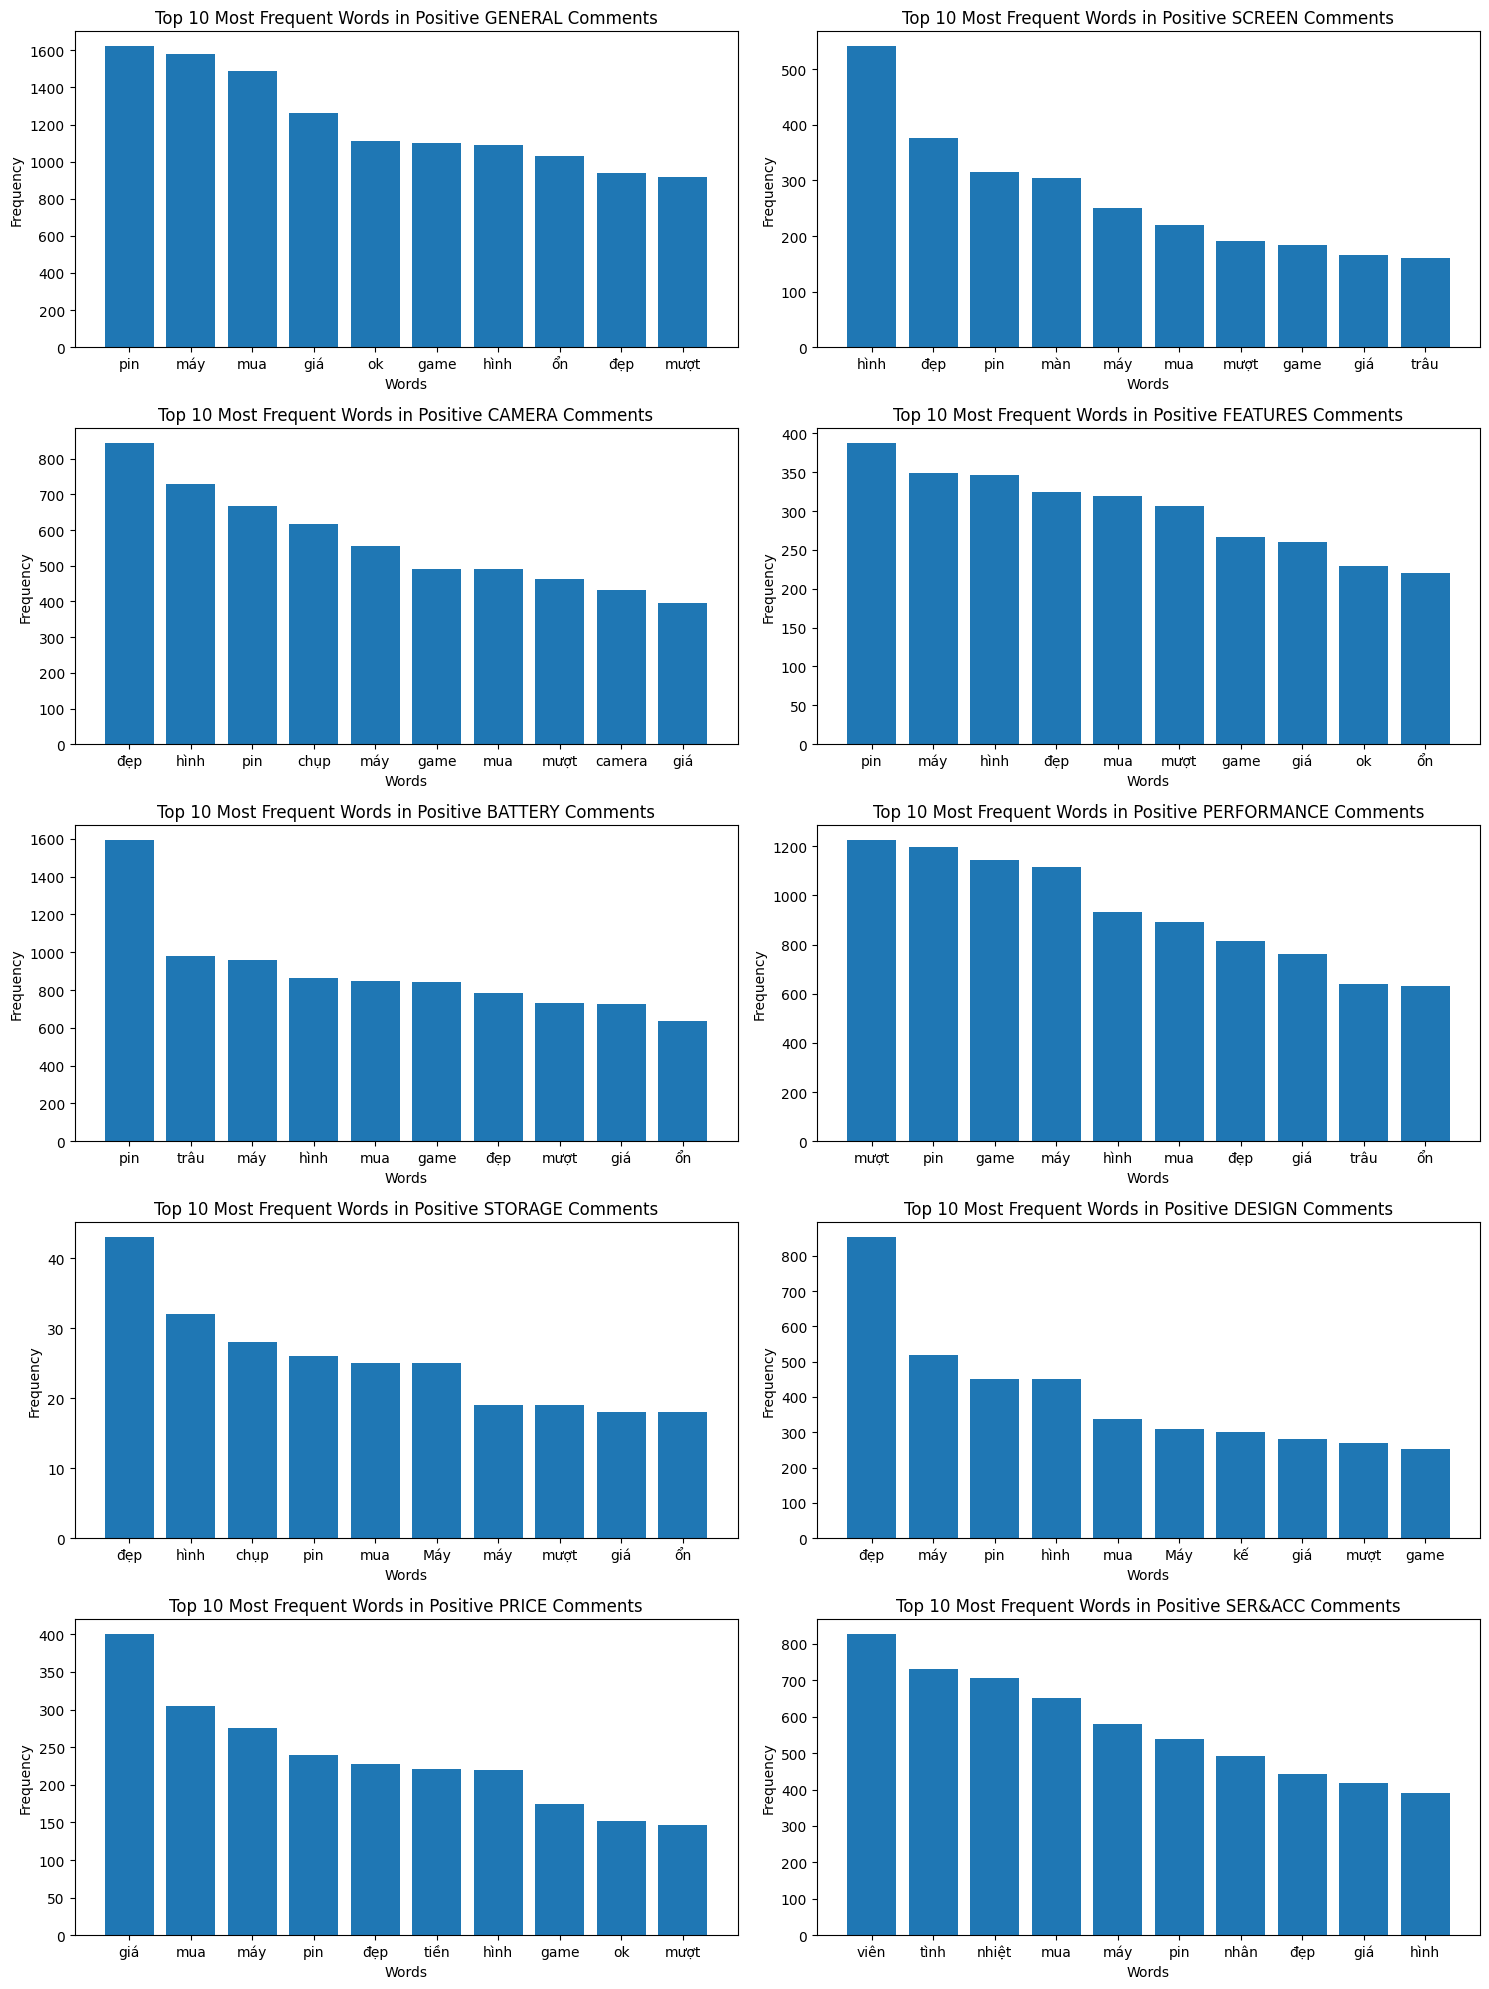

In [ ]:
# Top 10 most frequent words in POSITIVE comments on all aspects
visualize_top_frequent_word("Positive")

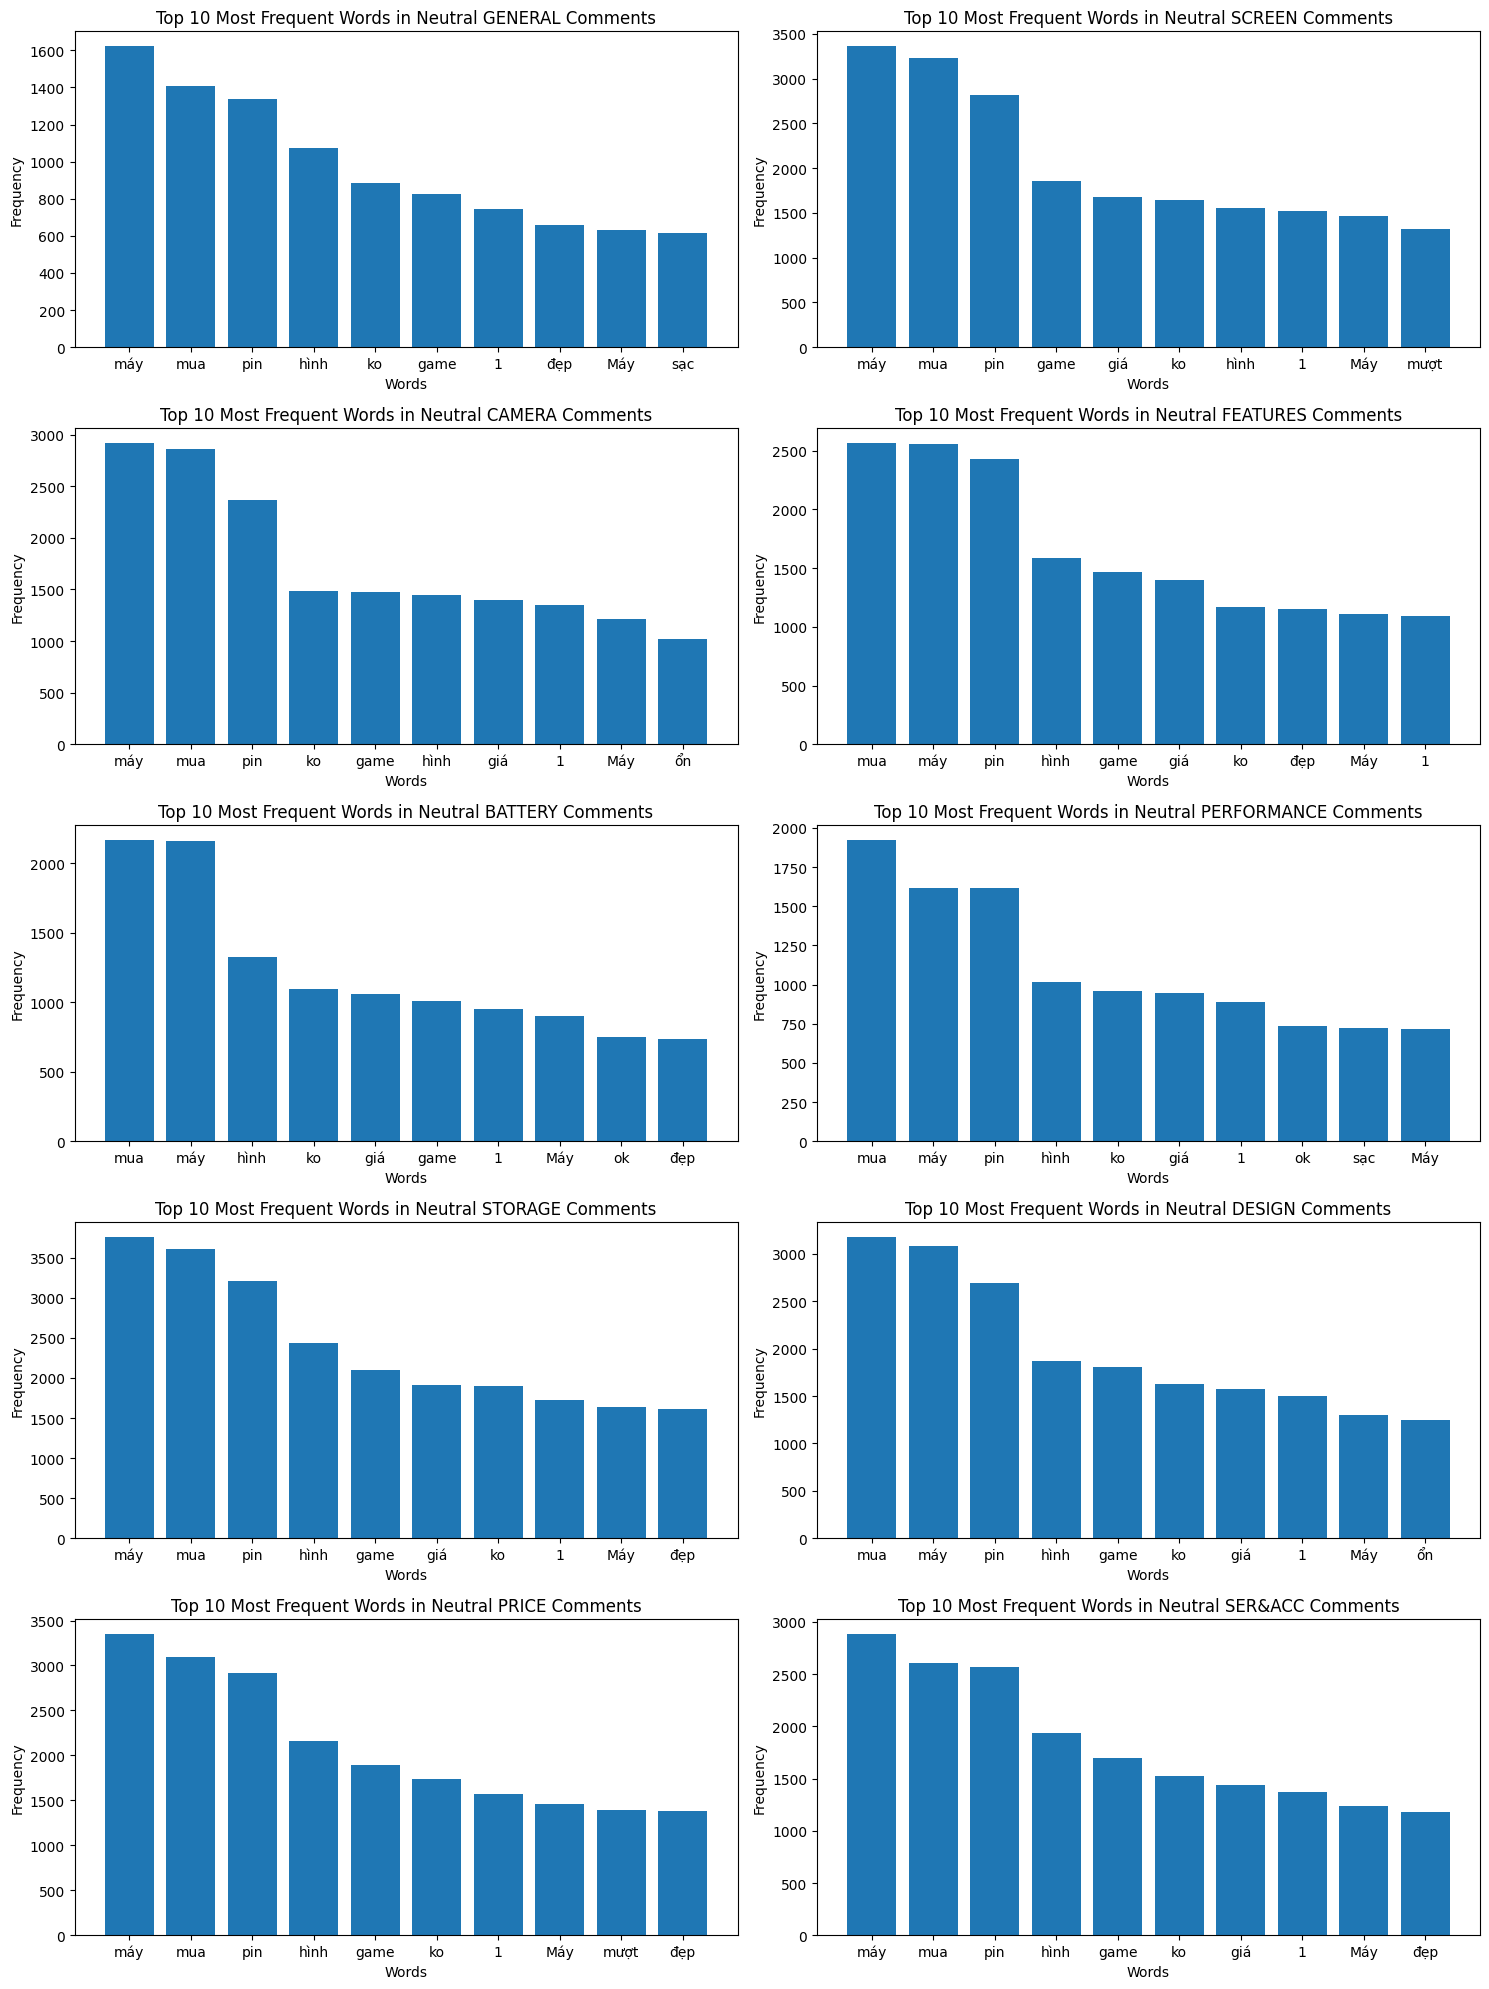

In [ ]:
# Top 10 most frequent words in NEUTRAL comments on all aspects
visualize_top_frequent_word("Neutral")

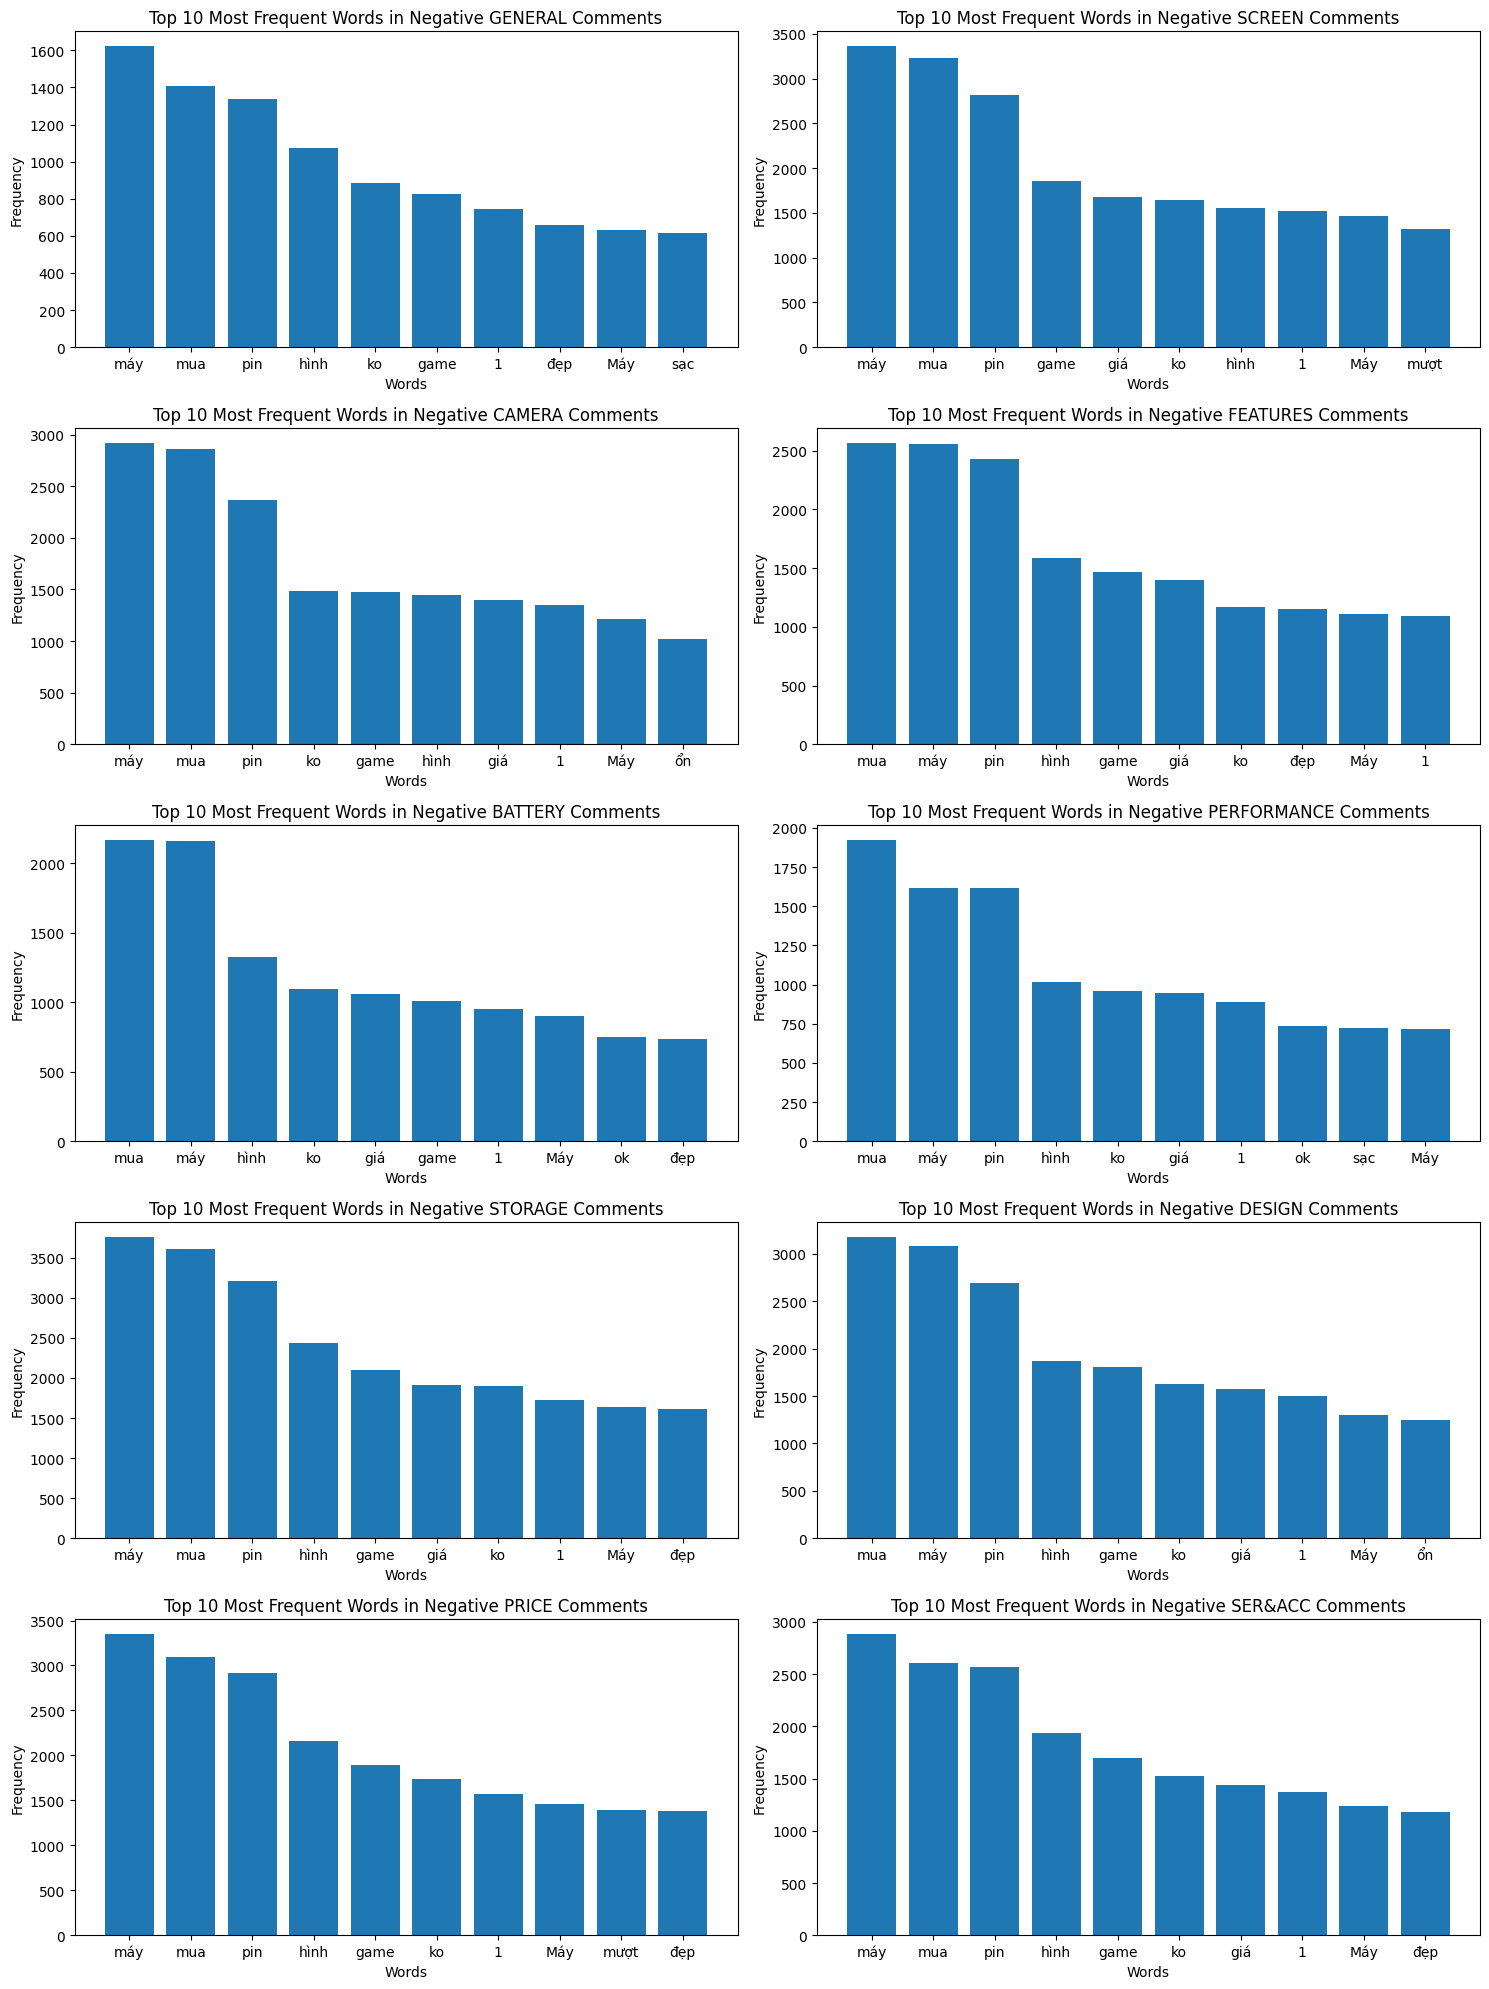

In [ ]:
# Top 10 most frequent words in NEGATIVE comments on all aspects
visualize_top_frequent_word("Negative")

In [ ]:
pca_train = PCA(n_components=10)
X_train_pca = pca_train.fit_transform(X_train_tok_enc.A)

Text(0, 0.5, 'Explained Variance Ratio')

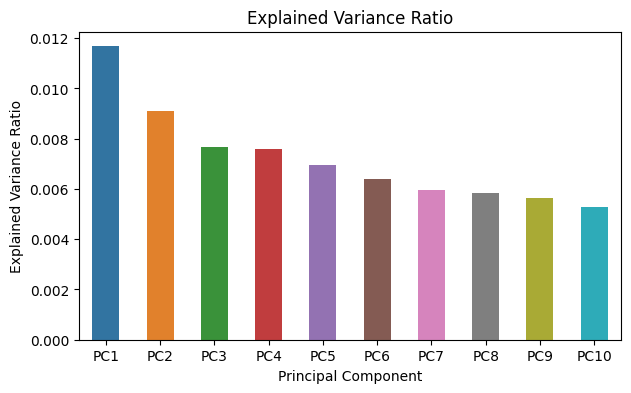

In [ ]:
# Plot bar chart for explained variance ratio
plt.figure(figsize=(7, 4))
sns.barplot(x=['PC'+str(i) for i in range(1, 11)], y=pca_train.explained_variance_ratio_, width=0.5)
plt.title('Explained Variance Ratio')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')

In [ ]:
pca_train = PCA(n_components=10)
X_test_pca = pca_train.fit_transform(X_test_tok_enc.A)

In [ ]:
# Number of subplots
X = 11

# Calculate the number of rows needed based on two columns per row
num_rows = (X + 1) // 2

# Create a subplot grid with two columns
fig, axes = plt.subplots(num_rows, 2, figsize=(12, 4 * num_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each subplot
for i, (ax, col) in enumerate(zip(axes, aspect_cols+['OTHERS'])):
    # Your Seaborn scatter plot code goes here
    sns.scatterplot(x=X_train_pca[:, 0], y=X_train_pca[:, 1], hue=df_train[col], ax=ax)

    # Set title for the subplot
    ax.set_title(f'Subplot of {col}')

# Remove empty subplots if the number of X is odd
if X % 2 == 1:
    fig.delaxes(axes[-1])

# Automatically adjust layout
plt.tight_layout()
plt.show()

Output hidden; open in https://colab.research.google.com to view.